# Part II - (CAD Analysis for men)
## by (Ezealigo Uchechukwu)


## Investigation Overview

The dataset 'DataClean-fullage' is clean and tidy and was obtained from Kaggle website.
Research has reported that there is a connection between heart failure and coronary artery disease (CAD). People with CAD are very like to have their heart fail, and such a condition is both caused or exacerbated by over 26 conditions including lifestyle. CAD is one of the early signs of heart disease marked by the formation of plaque in the walls of the arteries that channels blood to the heart. My focus is to identify the number of males from the given population with CAD and associated illness like diabetes and hypertension.



### Key insight

- Having CAD is not a death sentence because we have seen that 84% of the patients were discharged from the clinic between 0-5 days of being in the intensive care unit (ICU). This calls for more attention to one's health and lifestyle as one ages. In addition, regular medical check-up is advised as individuals approach certain age.

- Both genders are predisposed to having CAD.

- The males are highly at risk of having CAD. Hypertension and diabetes are key driving illness to developing CAD. Men should be careful especially when approaching middle and elderly age. Young men are advised to begin from their young age to consciously ensure that hypertension and developing diabetes is kept at minimal level.

- There is a correlation between hypertension, diabetes and CAD which is particularly high for the middle-aged and elderly men. Men who are close to this age range should adhere to a diet that checkmate their sugar level to prevent diabetes but most importantly, check their blood pressure regularly. Glucose concentration and diabetes are not found among the juvenile and young men, possibly due to some factors. For example sugar is needed for cell development and energy for high physical activities which are needed by males of such age category. 


## Dataset Overview
The original dataset has 6611 rows and 53 columns, then the dataset of focus has 11 columns only because we were interested on the patients with CAD, heart failure, hypertension, and diabetes.

Selected variables include:
age, gender, day_icu, outcome, diabetes, hypertension, cad, cardiomyopathy, heart_failure, pulmonary_embolism and glucose. These variables were analysed to give the key insight enumerated above.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the original the dataset into a pandas dataframe
heart = pd.read_csv('DataClean-fullage.csv')
heart.head()


,sno,age,gender,type,day_icu,outcome,smoking,alcohol,diabetes,hypertension,...,chest_infection,count,haemoglobin,anaemia,severe_anaemia,glucose,group_age,group_plate,group_leuk,group_ejectf
0,1,81,M,E,2,DISCHARGE,0,0,1,0,...,0,1,9.5,1,0,80.0,76-150,normal,high,d_normal
1,3,53,M,E,3,DISCHARGE,0,0,1,0,...,0,1,10.6,0,0,187.0,46-60,normal,high,d_normal
2,5,60,F,E,9,DISCHARGE,0,0,0,1,...,0,1,13.6,0,0,144.0,46-60,low,normal,d_normal
3,6,44,M,E,8,DISCHARGE,0,0,1,1,...,0,1,13.5,0,0,217.0,31-45,normal,high,d_normal
4,7,56,F,E,2,DISCHARGE,0,0,1,1,...,0,1,13.3,0,0,277.0,46-60,normal,high,d_normal


In [3]:
# Not all the columns or variables will be of interest in this investigation.

variable_drop = ['sno', 'count', 'alcohol', 'haemoglobin', 'type', 'ckd', 'atypical_chest_pain', 'leuk_count', 'platelets', 'smoking','urinary_tract', 'urea', 'creatinine', 'bnp', 'acute_kidney', 'congenital', 'anaemia', 'chest_infection','severe_anaemia','raised_cardiac', 'eject_fraction', 'stable_angina', 'acs', 'count','stemi', 'hfref','hfnef',
                 'valvular', 'chb', 'sick_sinus', 'atrial_fibril', 'cva_infract', 'cva_bleed','ventricular', 'psvt', 'neuro_cardiogenic_syncope', 
                 'orthostatic', 'infective_endocarditis', 'deep_venous', 'group_age', 'group_plate', 'group_leuk',
                 'group_ejectf']
# Using .drop to drop unwanted columns 
df=heart.drop(axis=1, index=None, columns=variable_drop, level=None, inplace=False, errors='raise')
df.head()
df.describe()

,age,day_icu,diabetes,hypertension,cad,cardiomyopathy,heart_failure,pulmonary_embolism,glucose
count,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000
mean,63.991075,4.857056,0.319921,0.510513,0.697171,0.224626,0.477840,0.015429,171.856436
std,12.865395,4.354418,0.466481,0.499927,0.459516,0.417367,0.499546,0.123260,90.174224
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,56.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.000000
50%,65.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,142.000000
75%,73.000000,6.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,210.000000
max,110.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,809.000000


In [4]:
dfC=df.copy()

### Among the heart disease, which of them is the most prevalent?

From the data, CAD heart disese is the most prevalent compared to heart failure and cardiomyopathy, having 70% of the total patients.

In [5]:
#define data
def pie_chart(dfC_name, column_name):
    x2= dfC_name[column_name].value_counts()
    labels2 = dfC_name[column_name].value_counts().index
    #define Seaborn color palette to use
    colors = sb.color_palette('pastel')[0:2]
    #create pie chart
    plt.pie(x2, labels = labels2, colors = colors, autopct='%.0f%%', startangle=90)
    plt.axis('square')
    plt.show()



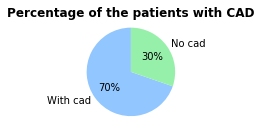

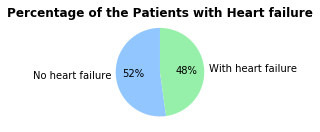

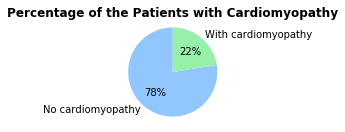

In [6]:


plt.subplot(1,3,1)
dfC['cad']= dfC['cad'].replace({1: 'With cad', 0: 'No cad'})
plt.title('Percentage of the patients with CAD', weight='bold')
pie_chart(dfC, 'cad');

plt.subplot(1,3,2)
dfC['heart_failure'] = dfC['heart_failure'].replace({1: 'With heart failure', 0: 'No heart failure'})
plt.title('Percentage of the Patients with Heart failure',  weight='bold')
pie_chart(dfC, 'heart_failure');

plt.subplot(1,3,3)
dfC['cardiomyopathy'] = dfC['cardiomyopathy'].replace({1: 'With cardiomyopathy', 0: 'No cardiomyopathy'})
plt.title('Percentage of the Patients with Cardiomyopathy',  weight='bold')
pie_chart(dfC, 'cardiomyopathy');


### What could be the key factor(s) for having CAD?

Hypertension followed by diabetes are key factors responsible for CAD. However, there may be some patients that may have both hypertension and diabetes which we shall consider in subsequent slide.

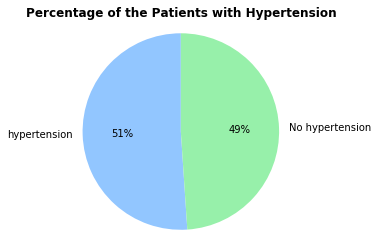

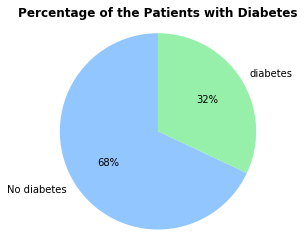

In [7]:
# Considering the diabetes and hypertension as key factors to heart disease
dfC['hypertension'] = dfC['hypertension'].replace({1: 'hypertension', 0: 'No hypertension'})
plt.title('Percentage of the Patients with Hypertension',  weight='bold')
pie_chart(dfC, 'hypertension');


dfC['diabetes'] = dfC['diabetes'].replace({1: 'diabetes', 0: 'No diabetes'})
plt.title('Percentage of the Patients with Diabetes',  weight='bold')
pie_chart(dfC, 'diabetes');

### Categorizing patients investigated based on gender: which gender is highly prone to CAD?

The Male gender are highly susceptible to CAD than females. There 62% males and 32% females.

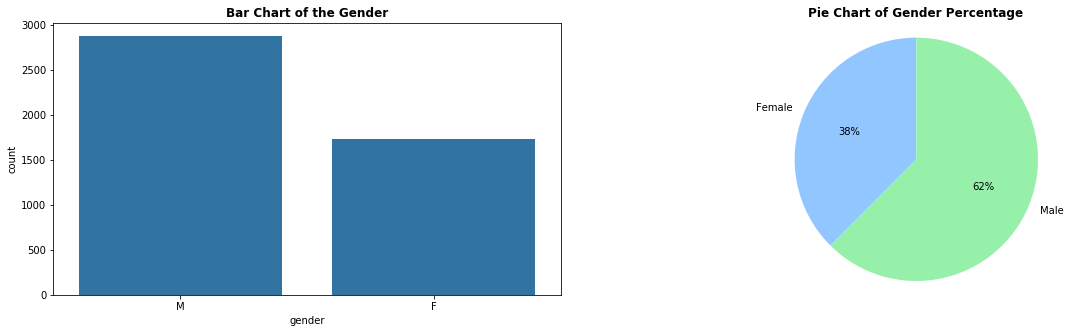

In [8]:
# selecting patients with CAD
cad_patients= df[df['cad']== 1]
cad_patients.head()
plt.figure(figsize=(20, 5))

# plot the gender with CAD
plt.subplot(1, 2, 1)
colour= sb.color_palette()[0]
sb.countplot(data= cad_patients, x='gender', color=colour)
plt.title('Bar Chart of the Gender',  weight='bold')

plt.subplot(1, 2, 2)
#define data
data_1 = [1730,2879]
labels_1 = ['Female', 'Male']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data_1, labels = labels_1, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.title('Pie Chart of Gender Percentage',  weight='bold')
plt.show()

### Based on gender, what is the number of patient with other health condition?

Apart from CAD, the male gender were also more prone to having heart failure and cardiomyopathy than females.

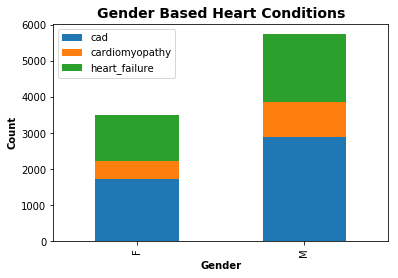

In [9]:
# To determine the aggregate sum of the variables for those with CAD according to gender
gender_based_issues= pd.pivot_table(dfC, index= 'gender', aggfunc=sum)
gender_based_issues

# Make a copy of the original df dataframe
df_copy = df.copy(deep=True)

# Create a dataframe for the specific heart issues
heart_issues_df= df_copy[['gender', 'cad', 'heart_failure', 'cardiomyopathy']]
heart_issues_df.head()

# Generate a pivot table
heart_issues_1= pd.pivot_table(heart_issues_df, index= 'gender', aggfunc=sum)
heart_issues_1

# plot a stacked bar chart
heart_issues_1.plot(
        kind='bar',
        stacked=True)

plt.title("Gender Based Heart Conditions",
                 fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel("Gender",fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel("Count",
               fontsize = 10, weight = "bold");

### Red Alert for Men

Beyond gender, the number of men with heart related disease and conditions is overwhelmingly high.

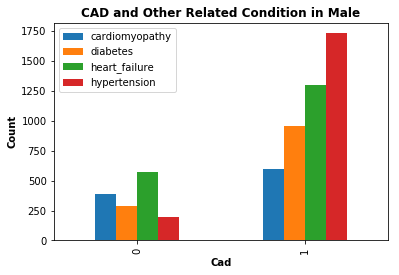

In [10]:
# To select only the male gender
Men= df_copy[df_copy['gender']== 'M']
Men.head()

# Create a pivot table function
def pivot_table(Men, column_name):
  return pd.pivot_table(Men, index= column_name, aggfunc=sum)

# To create a dataframe with disease and heart condition
cad_dbt_df = Men[['cad', 'diabetes', 'heart_failure', 'cardiomyopathy', 'hypertension']]
cad_dbt_df.head()

#pivot_table(df, column_name)
cad_pivot_table = pivot_table(cad_dbt_df, 'cad')
cad_pivot_table

# Create a function for plotting grouped bar chart
def bar_graph(pivot_table, column_name):
  # Plot a bar graph
  pivot_table.plot(kind='bar', stacked=False)

  plt.title(column_name.title(),
                fontsize = 14, weight = "bold")
  # Add x label and format it
  plt.xlabel(column_name.title(),fontsize = 10, weight = "bold")
  # Add y label and format it
  plt.ylabel("Count", fontsize = 10, weight = "bold");

bar_graph(cad_pivot_table, 'cad')
plt.title('CAD and Other Related Condition in Male', weight='bold');

### Men, beware of high blood sugar!

Men with CAD and diabetes are more prone to having hypertension than those with other heart conditions.

Text(0.5,1,'Other Related Conditions in Males with Both CAD and Diabetes')

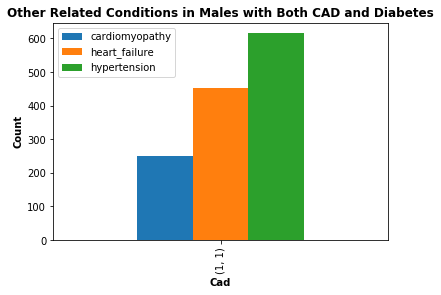

In [11]:
# to select the males with CAD that both drink alcohol and smoke
cad_dbt= Men.query('cad ==1 & diabetes ==1')
cad_dbt.head()

# This is to view the frequency of the counts
cad_dbt.groupby(['heart_failure', 'cardiomyopathy', 'hypertension']).size()

cad_dbt_df = cad_dbt[['cad', 'diabetes','heart_failure', 'cardiomyopathy', 'hypertension']]
cad_dbt_df.head()

#pivot_table(df, column_name)
cad_pivot_table = pivot_table(cad_dbt_df, ['cad','diabetes'])
cad_pivot_table


bar_graph(cad_pivot_table, 'cad')
plt.title('Other Related Conditions in Males with Both CAD and Diabetes', weight='bold')


### Diabetes and hypertension

The risk of having CAD is very high when the patient suffers hypertension and diabetes.

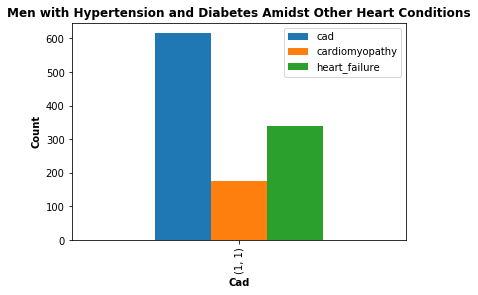

In [12]:
Men_hyp_dbt= Men.query('hypertension ==1 & diabetes ==1')
Men_hyp_dbt.head()

# This is to view the frequency of the counts
Men_hyp_dbt.groupby(['cad','heart_failure', 'cardiomyopathy']).size()

# To create a dataframe with hypertension and diabetes with other heart condition
Men_hyp_dbt_df = Men_hyp_dbt[['cad','heart_failure', 'cardiomyopathy', 'diabetes','hypertension']]
Men_hyp_dbt_df.head()

#pivot_table hypertension and diabetes(df, column_name)
hyp_dbt_pivot_table = pivot_table(Men_hyp_dbt_df, ['hypertension','diabetes'])
hyp_dbt_pivot_table

bar_graph(hyp_dbt_pivot_table, 'cad')
plt.title('Men with Hypertension and Diabetes Amidst Other Heart Conditions', weight='bold');

### The number of men discharged compared to DAMA and Expiry

84% of men were discharge between 0-5 days of being in the ICU compared to those discharged agaist medical advice (DAMA) and EXPIRY.

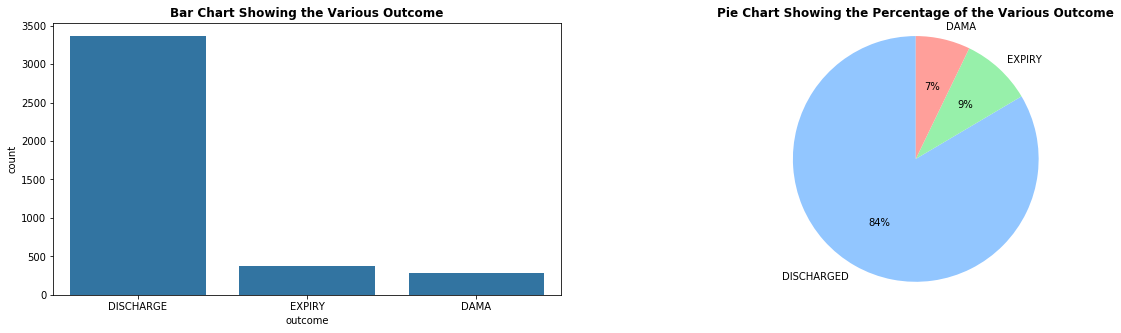

In [13]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sb.countplot(data= Men, x='outcome', color=colour)
plt.title('Bar Chart Showing the Various Outcome',  weight='bold')

plt.subplot(1, 2, 2)
#define data
data_outcome = [3367, 376, 289]
labels_outcome = ['DISCHARGED', 'EXPIRY', 'DAMA']

#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data_outcome, labels = labels_outcome, colors = colors, autopct='%.0f%%', startangle=90)
plt.axis('square')
plt.title('Pie Chart Showing the Percentage of the Various Outcome',  weight='bold')
plt.show()

### Categorizing the male gender by age: what age category has the highest count?

The men in the elderly followed by the middle aged men categories were the highest compared to juveniles, young, senile and long livers.

Text(0.5,1,'Age category in Male')

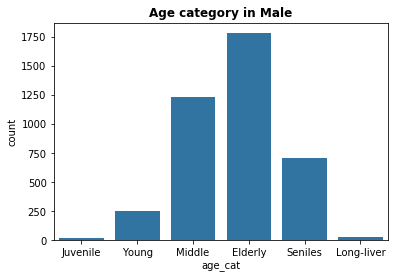

In [14]:
# for weight-Bin edges that will be used to "cut" the data into groups
# Fill in this list with seven values 
bin_edges = [1, 24, 44, 60, 75, 90, 110] 

#The age categorization was performed according to Dyussenbayev, A. (2017)

# Labels for the four height level groups
bin_names = ['Juvenile', 'Young', 'Middle','Elderly', 'Seniles', 'Long-liver'] # Name each height level category

# Creates height_levels column
Men['age_cat']= pd.cut(Men.age, bin_edges, labels=bin_names)

# To categorize the selected data using groupby
cat_age= Men.groupby('age_cat', axis=0, level=None, as_index=False, sort=True).sum()
cat_age

# plotting the age category for all the patient investigated
color=sb.color_palette()[0]
sb.countplot(data= Men, x= 'age_cat', color=color);
plt.title('Age category in Male', weight='bold')

### At what age should men be mindful of their blood glucose concentration?

From the middle age of about 40-80years, we noticed that the blood glucose level was gradually increasing from age 40 and became intensed at 50-60 years. It is possible that due to this reason, men at this age may suffer from diabetes. We shall find out in the subseqent slide.

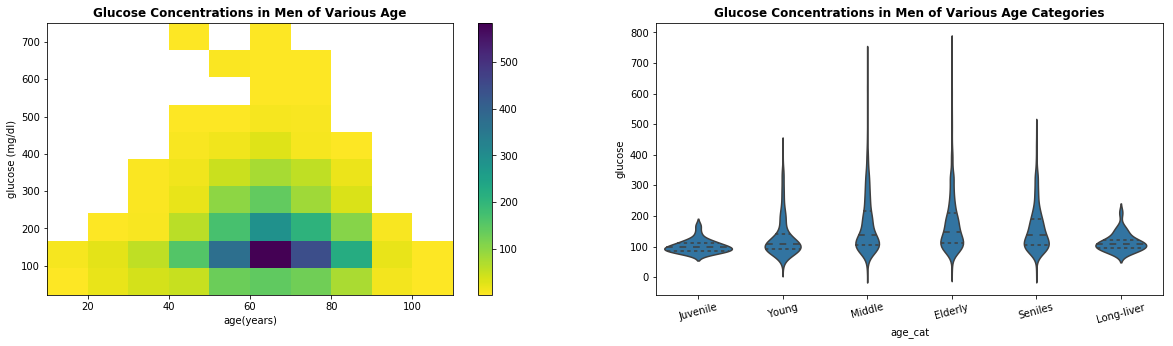

In [15]:
# To make a copy of the male dataframe
Male = Men.copy()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
# plot a heat plot of age and glucose
plt.hist2d(data = Male, x = 'age', y = 'glucose', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.title('Glucose Concentrations in Men of Various Age', weight='bold')
plt.xlabel('age(years)')
plt.ylabel('glucose (mg/dl)');

plt.subplot(1, 2, 2)
# make a violin plot of glucose based on the age category
base_color = sb.color_palette()[0]
sb.violinplot(data=Male, x='age_cat', y='glucose', color=base_color, inner='quartile')
plt.title('Glucose Concentrations in Men of Various Age Categories', weight='bold')
plt.xticks(rotation=15);

### How does blood glucose concentration affect the men with or without CAD based on age category?

The glucose concentration for the middle aged, elderly, and senile men was high for those with cad compared to the juveniles, young and long livers with or without CAD.

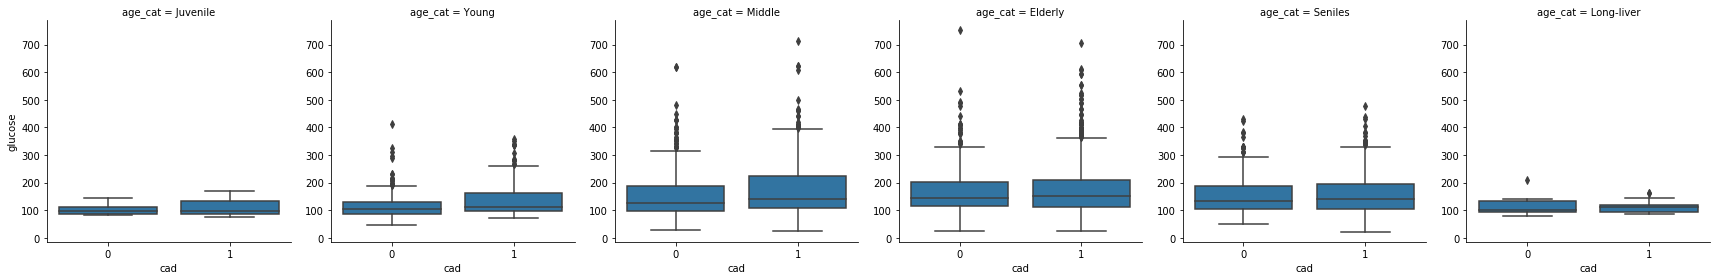

In [16]:
# plot cad vs blood glucose concentration based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
plt.title('Glucose Concentrations in Men with and without CAD of Various Age Categories', weight='bold')

g.map(sb.boxplot, 'cad', 'glucose')


### Is there a connection with the number of days in the icu and men with or without CAD based on age category?

Any male at any age category with or without CAD can spend similar number of days in the icu except for the juveniles with CAD. Men in the age category of young may slightly begin to visit hospital but obviously at 50 years through to 70 years. Their visit and the number of days spent in the intensive care unit of the hospital may increase as year increases.

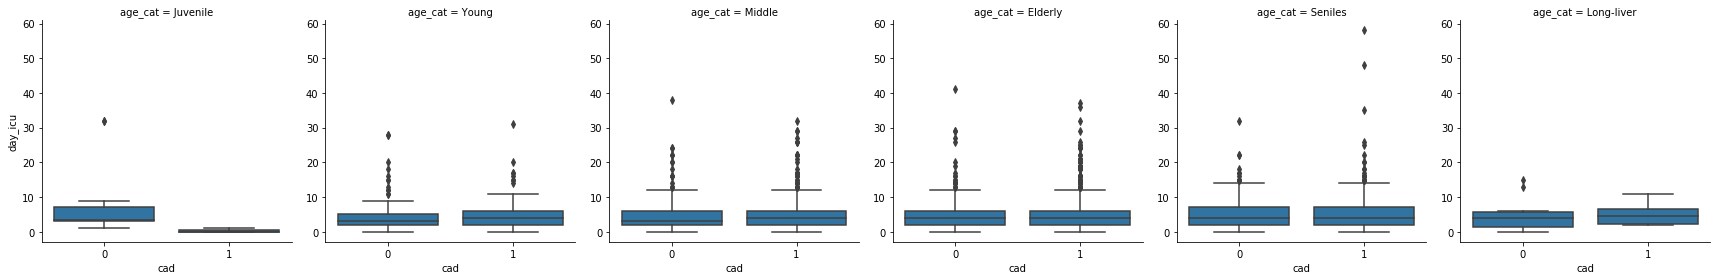

In [17]:
# plot cad vs number of days in the icu based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'day_icu')

### What are the age categories that have both CAD and diabetes?

The juveniles and the young have no report of CAD and diabetes while the middle, elderly, senile and long livers are diabetic and CAD. Although, there are males in the elderly and senile categories that do not have CAD but are diabetic while in both the middle and long livers, there males that do not have both CAD and diabetes.

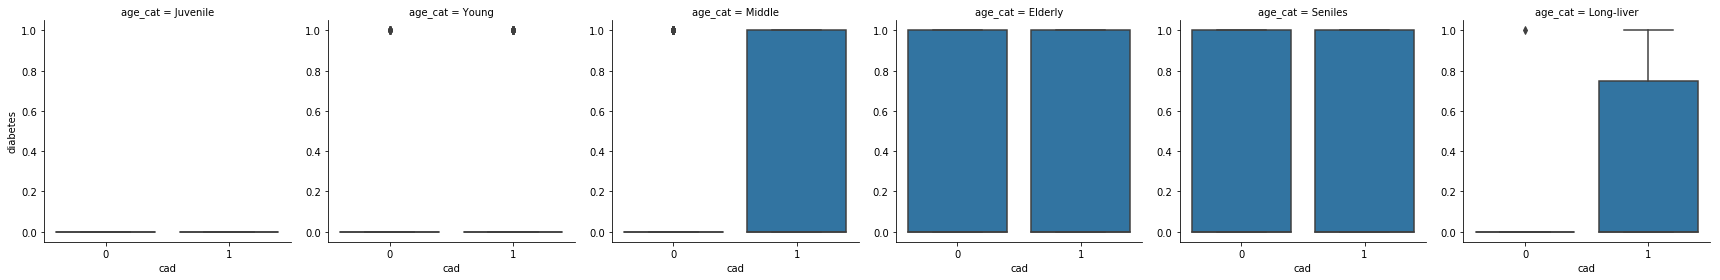

In [18]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'diabetes')

### What age category is largely at the risk of having both hypertension and diabetes?

The juveniles and the young have no report of hypertension and diabetes while the middle, elderly, senile and long livers are diabetic and hypertensive. Also, the elderly and elderly can be diabetic and not hypertensive. Similarly, there can be diabetic males without hypertension in males of senile and long liver category.

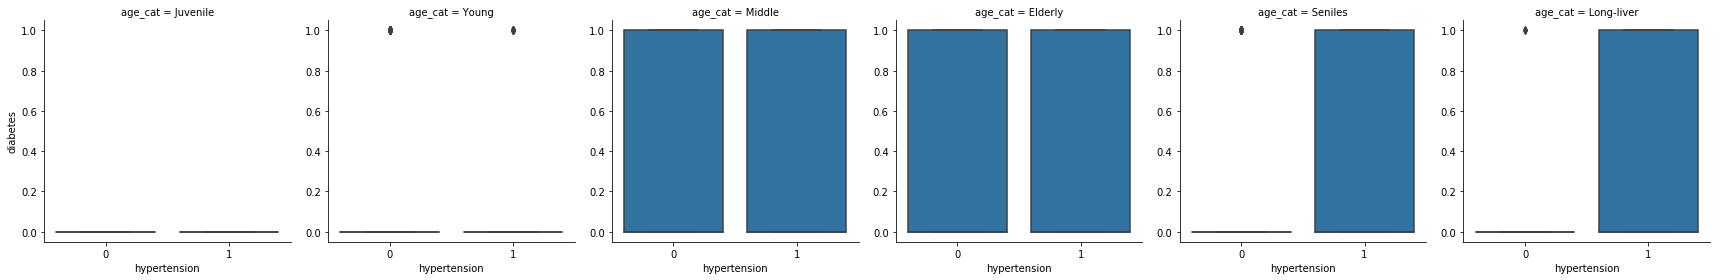

In [19]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'hypertension', 'diabetes')

### What age category is highly prone to hypertension and CAD?

Every male with CAD is hypertensive but its degree is lower in juveniles. But the Senile with no cad can also be hypertensive.

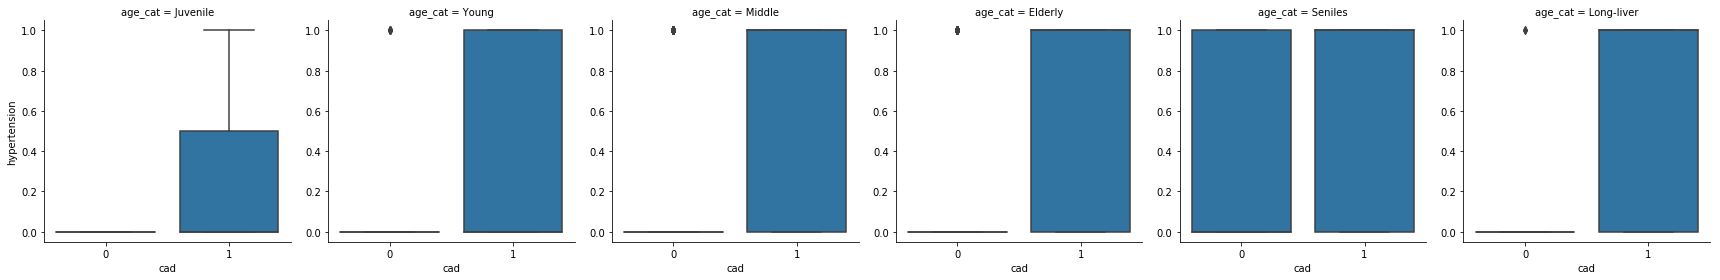

In [20]:
# plot diabetes vs cad based on age category
g = sb.FacetGrid(data = Male, col = 'age_cat', size = 4)
g.map(sb.boxplot, 'cad', 'hypertension')

### Generate Slideshow
Use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_CAD_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_CAD_Analysis.ipynb to slides
[NbConvertApp] Writing 608119 bytes to Part_II_CAD_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_CAD_Analysis.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser